In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.datasets.longley import load_pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/전체데이터.xlsx')

---
> # **변수선정**

In [240]:
df.corr()

,PM2.5(bj),PM10(bj),PM2.5(gn),PM10(gn),PM2.5(tg),PM10(tg),SO2 (ppm),PM10 (ug/m3),O3 (ppm),NO2 (ppm),CO (ppm),PM2.5 (ug/m3),평균기온(°C),일강수량(mm),평균 풍속(m/s),평균,1y_PM10
PM2.5(bj),1.000000,0.581888,0.379608,0.267125,0.760950,0.554950,0.122599,0.209550,-0.122257,0.287502,0.259598,0.277803,-0.073812,-0.014284,-0.339012,0.061257,0.104136
PM10(bj),0.581888,1.000000,0.284610,0.463468,0.460713,0.824239,0.105830,0.247403,0.030496,0.205387,0.202383,0.214987,-0.075575,-0.049088,-0.136788,0.055293,0.091770
PM2.5(gn),0.379608,0.284610,1.000000,0.798413,0.584176,0.462822,0.331691,0.438740,-0.343194,0.424497,0.524716,0.500164,-0.421883,-0.106136,-0.360680,-0.005725,0.266504
PM10(gn),0.267125,0.463468,0.798413,1.000000,0.404004,0.597193,0.264910,0.508517,-0.172480,0.348509,0.420923,0.419505,-0.362256,-0.133235,-0.190449,0.050752,0.202021
PM2.5(tg),0.760950,0.460713,0.584176,0.404004,1.000000,0.714954,0.221429,0.290128,-0.227684,0.364606,0.362084,0.379203,-0.232786,-0.071876,-0.371501,0.038536,0.162176
PM10(tg),0.554950,0.824239,0.462822,0.597193,0.714954,1.000000,0.207912,0.369159,-0.053209,0.295594,0.309458,0.334547,-0.214195,-0.100809,-0.192774,0.064491,0.138917
SO2 (ppm),0.122599,0.105830,0.331691,0.264910,0.221429,0.207912,1.000000,0.422595,-0.222349,0.387290,0.459681,0.415904,-0.406222,-0.160861,-0.172584,0.111536,0.262117
PM10 (ug/m3),0.209550,0.247403,0.438740,0.508517,0.290128,0.369159,0.422595,1.000000,-0.078319,0.501879,0.547517,0.798342,-0.398106,-0.237001,-0.099529,0.159795,0.256704
O3 (ppm),-0.122257,0.030496,-0.343194,-0.172480,-0.227684,-0.053209,-0.222349,-0.078319,1.000000,-0.367020,-0.261744,-0.098152,0.354445,-0.056802,0.474626,-0.106672,-0.172126
NO2 (ppm),0.287502,0.205387,0.424497,0.348509,0.364606,0.295594,0.387290,0.501879,-0.367020,1.000000,0.613818,0.538570,-0.389921,-0.172360,-0.424778,0.280027,0.184510


In [5]:
plt.rc('font', family='NanumBarunGothic') 

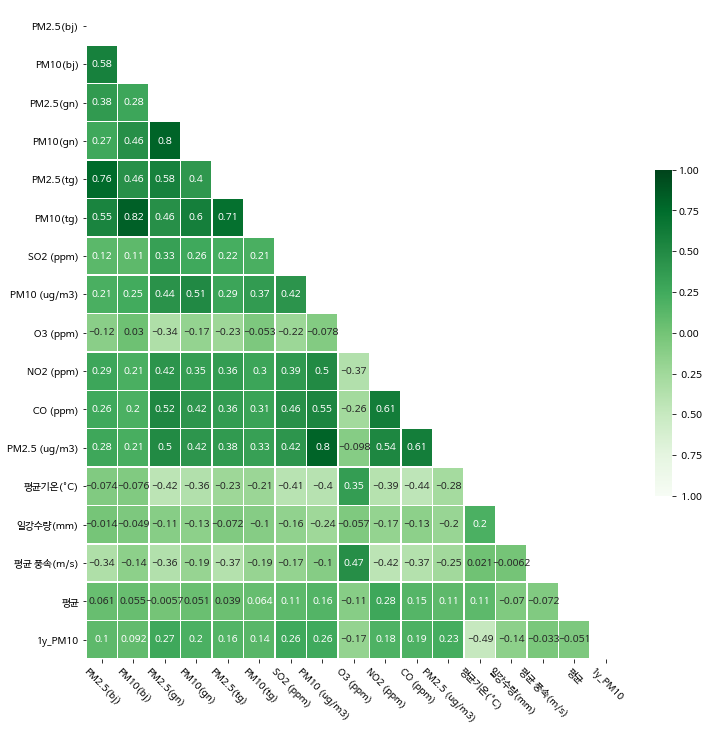

In [241]:
dfcorr = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(12,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(dfcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(dfcorr, 
            cmap = 'Greens', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.xticks(rotation = - 45 )
plt.show()

> # **상관계수 시각화**

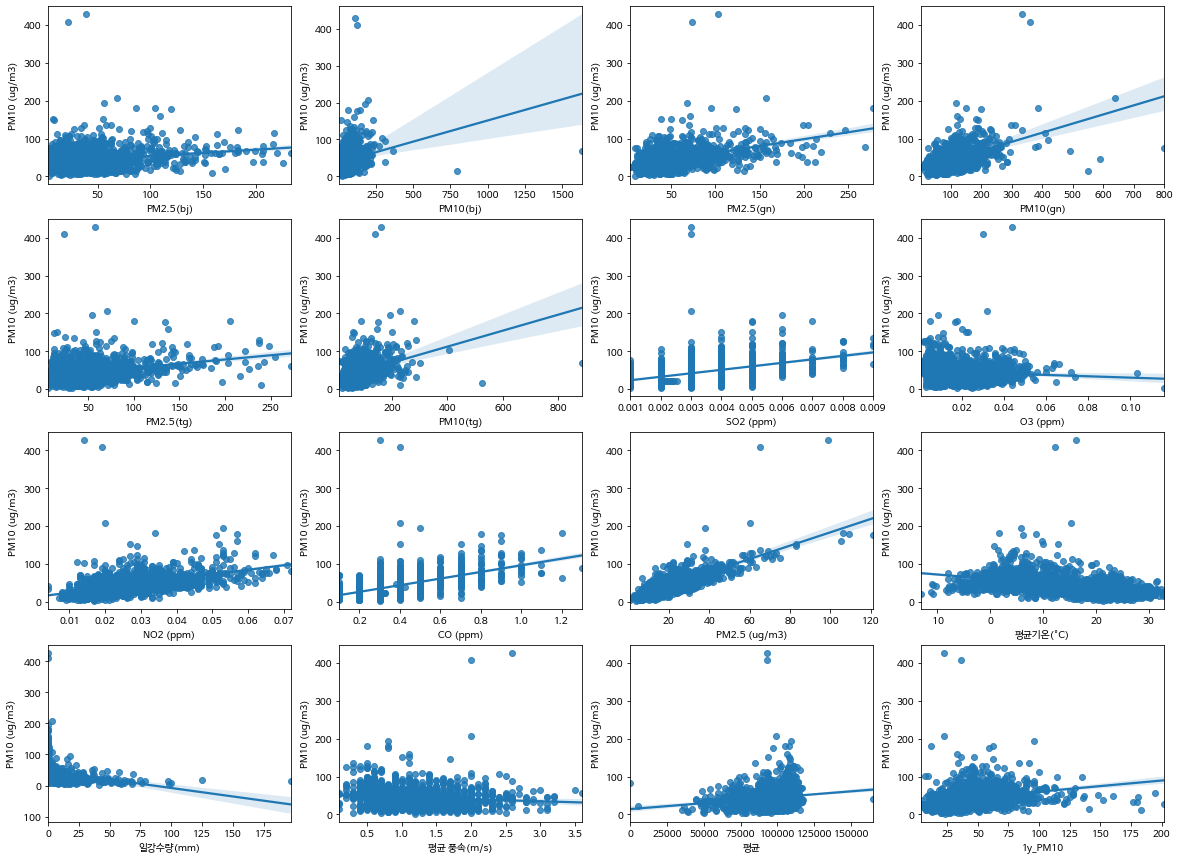

In [322]:
 fig, axs = plt.subplots(figsize=(20, 15), nrows=4, ncols=4) 


x_features = ['PM2.5(bj)', 'PM10(bj)', 'PM2.5(gn)', 'PM10(gn)', 'PM2.5(tg)',
       'PM10(tg)', 'SO2 (ppm)',  'O3 (ppm)', 'NO2 (ppm)',
       'CO (ppm)', 'PM2.5 (ug/m3)', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균',
       '1y_PM10']


for i, feature in enumerate(x_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PM10 (ug/m3)', data = df,\
               ax = axs[row][col])

> # **다중공산성을 확인하기 위한 시각화**

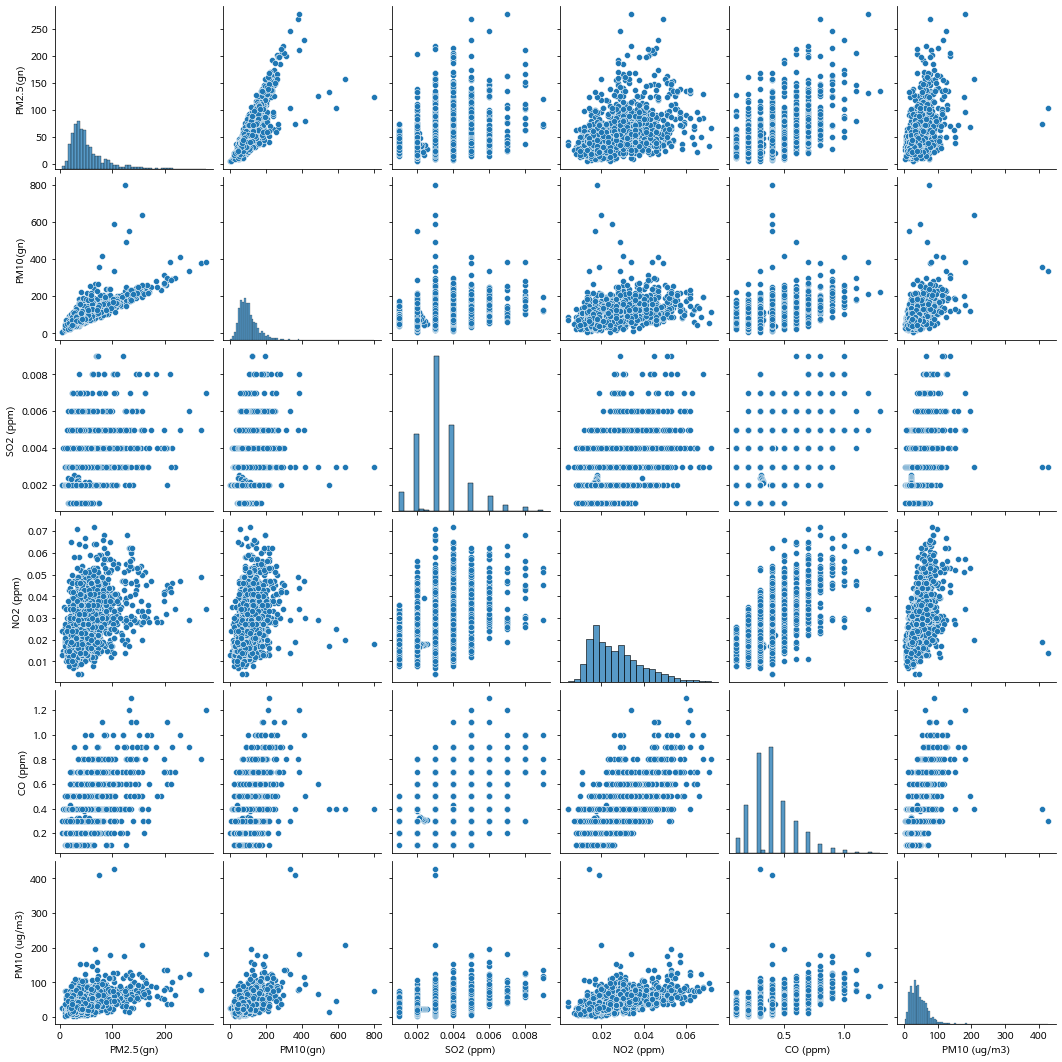

In [324]:
ccol = ['PM2.5(gn)', 'PM10(gn)','SO2 (ppm)','NO2 (ppm)','CO (ppm)','PM10 (ug/m3)']

# pairplot 시각화 
# boston_df[['INDUS','LSTAT','RM','PRICE']] -> 각각의 열을 짝맞춰서 그려
sns.pairplot(df[ccol])

In [245]:
A = df[['PM2.5(gn)', 'PM10(gn)','SO2 (ppm)','NO2 (ppm)','CO (ppm)','PM10 (ug/m3)']]

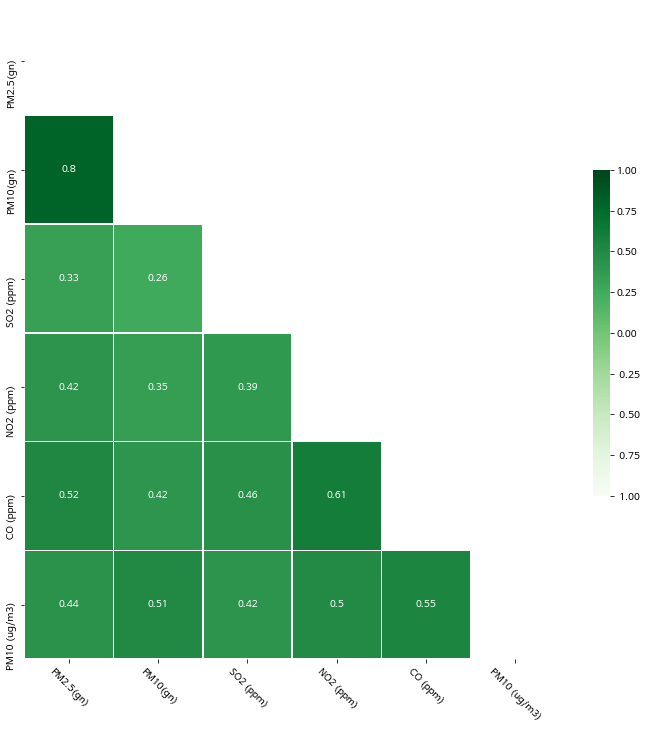

In [246]:
Acorr = A.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(12,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(Acorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(Acorr, 
            cmap = 'Greens', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.xticks(rotation = - 45 )
plt.show()

> ## *독립변수 : PM10(gn), SO2 (ppm), NO2 (ppm), CO (ppm)*
> ## *종속변수 : PM10 (ug/m3)*
- *PM10(gn)* 
  : PM2.5(gn)과의 상관계수가 0.8 이상, PM2.5(gn)과 종속변수와의 상관계보다 PM10 (gn)과 종속변수와의 상관계수가 더 높아 PM10 (gn) 채택 
- *PM10 (ug/m3) 채택*
  : 미세먼지가 초미세먼지를 포괄하는 개념이므로 미세먼지(PM10) 채택
  


--- 
> # **데이터 준비**
- test_size=0.1
  : 데이터 수가 많지 않기 때문에 훈련 테스트셋의 크기를 키우기 위해 테스트 데이터의 사이즈를 0.1로 조정
- random_state
  : 여러 모델을 훈련시켜야 하고, 고정하지 않으면 평가지표의 수치가 변해 데이터 고정

In [431]:
X= df[['PM10(gn)','SO2 (ppm)','NO2 (ppm)','CO (ppm)']]
y = df['PM10 (ug/m3)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=115)

### **스케일링 데이터 준비**

In [432]:
scaler_s = StandardScaler()
scaler_m = MinMaxScaler()

X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train))
X_test_s = pd.DataFrame(scaler_s.fit_transform(X_test))
X_train_m = pd.DataFrame(scaler_m.fit_transform(X_train))
X_test_m = pd.DataFrame(scaler_m.fit_transform(X_test))

> ## **선형회귀**
- lr 
  : 본래 데이터셋 선형회귀 모델 학습, 4개 평가지표 출력
- lr_s 
  : Standard Scaler를 활용하여 표준화한 데이터로 학습 , 4개 평가지표 출력
- lr_s 
  : MinMax Scaler를 활용하여 표준화한 데이터로 학습 , 4개 평가지표 출력

##### *평가지표를 하나의 표로 정리*

In [408]:
comp_df = pd.DataFrame(index=('MSE','RMSE','R2','Adjusted R2'))

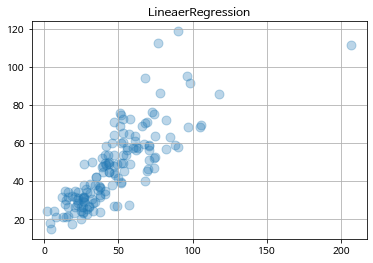

< 선형회귀 >
MSE: 250.469
RMSE: 15.826
R2: 0.647
Adj-R2: 0.422 



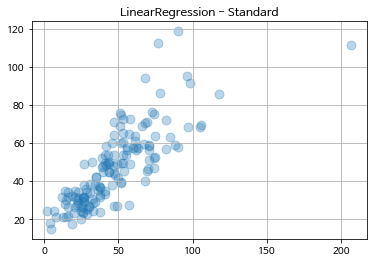

< StandardScaling 선형회귀 >
MSE: 267.612
RMSE: 16.359
R2: 0.623
Adj-R2: 0.422 



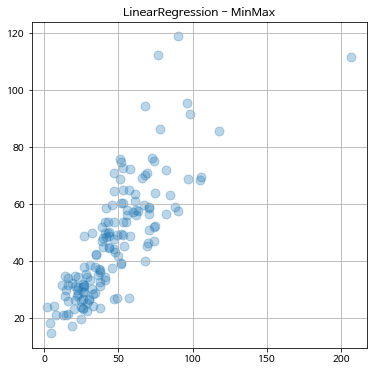

< MinMaxScaling 선형회귀 >
MSE: 246.945
RMSE: 15.714
R2: 0.652
Adj-R2: 0.422 



In [425]:
# 선형회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-lr.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )


plt.scatter(y_test, y_pred, s=80, alpha=0.3)
plt.title('LineaerRegression')
plt.grid()
plt.show()


print("< 선형회귀 >")
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(adj_r2), '\n')

comp_df['LR'] = [mse, rmse, r2, adj_r2]

 

# Standard Scaling data  - Linear Regression

lr_s = LinearRegression()
lr_s.fit(X_train_s, y_train)
y_pred_s = lr_s.predict(X_test_s)

mse = mean_squared_error(y_test, y_pred_s)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_s)
adj_r2 = 1 - ( 1-lr_s.score(X_train_s, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train_s.shape[1] - 1 )


plt.scatter(y_test, y_pred, s=80, alpha=0.3)
plt.title('LinearRegression - Standard')
plt.grid()
plt.show()

print("< StandardScaling 선형회귀 >")
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(adj_r2), '\n')

comp_df['LR_Standard'] = [mse, rmse, r2, adj_r2]



# MinMax Scaling data - Linear Regression

lr_m = LinearRegression()
lr_m.fit(X_train_m, y_train)
y_pred_m = lr_m.predict(X_test_m)

mse = mean_squared_error(y_test, y_pred_m)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_m)
adj_r2 = 1 - ( 1-lr_m.score(X_train_m, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train_m.shape[1] - 1 )

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80, alpha=0.3)
plt.title('LinearRegression - MinMax')
plt.grid()
plt.show()

print("< MinMaxScaling 선형회귀 >")
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(adj_r2), '\n')

comp_df['LR_MinMax'] = [mse, rmse, r2, adj_r2]



> ## **랜덤포레스트 회귀**
- rf 
  : 본래 데이터셋 랜덤포레스트 회귀 모델 학습, 4개 평가지표 출력
- rf_s 
  : Standard Scaler를 활용하여 표준화한 데이터로 학습 , 4개 평가지표 출력
- rf_s 
  : MinMax Scaler를 활용하여 표준화한 데이터로 학습 , 4개 평가지표 출력



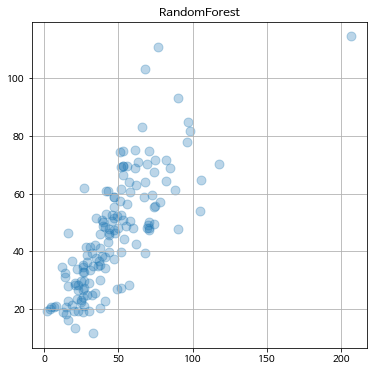

< RandomForest >
MSE: 283.707
RMSE: 16.844
R2: 0.600
Adj-R2: 0.921 



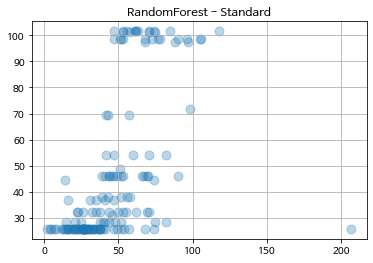

< RandomForest StandardScaling >
MSE: 687.803
RMSE: 26.226
R2: 0.030
Adj-R2: 0.926 



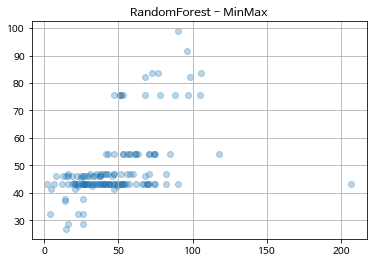

< RandomForest MinMaxScaling >
MSE: 531.101
RMSE: 23.046
R2: 0.251
Adj-R2: 0.924 



In [426]:
# 랜덤포레스트 회귀모델
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-rf.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80, alpha=0.3)
plt.title('RandomForest')
plt.grid()
plt.show()

print("< RandomForest >")
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(adj_r2), '\n')

comp_df['RF'] = [mse, rmse, r2, adj_r2]

# Standard Scaling data - RandomForest
rf_s = RandomForestRegressor()
rf_s.fit(X_train_s, y_train)
y_pred = rf.predict(X_test_s)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-rf_s.score(X_train_s, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train_s.shape[1] - 1 )


plt.scatter(y_test, y_pred, s=80, alpha=0.3)
plt.title('RandomForest - Standard')
plt.grid()
plt.show()

print("< RandomForest StandardScaling >")
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(adj_r2), '\n')

comp_df['RF_Standard'] = [mse, rmse, r2, adj_r2]

# MinMax Scaling data - RandomForest
rf_m = RandomForestRegressor()
rf_m.fit(X_train_m, y_train)
y_pred = rf.predict(X_test_m)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ( 1-rf_m.score(X_train_m, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train_m.shape[1] - 1 )


plt.scatter(y_test, y_pred, alpha=0.3)
plt.title('RandomForest - MinMax')
plt.grid()
plt.show()

print("< RandomForest MinMaxScaling >")
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(adj_r2), '\n')

comp_df['RF_MinMax'] = [mse, rmse, r2, adj_r2]

> ## **OLS**
- model 
  : 본래 데이터셋 OLS 모델 학습, 4개 평가지표 출력
- model_s 
  : Standard Scaler를 활용하여 표준화한 데이터로 학습 , 4개 평가지표 출력
- model_m 
  : MinMax Scaler를 활용하여 표준화한 데이터로 학습 , 4개 평가지표 출력


< OLS > 
                                 OLS Regression Results                                
Dep. Variable:           PM10 (ug/m3)   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              1568.
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                        0.00
Time:                        17:33:59   Log-Likelihood:                         -6057.0
No. Observations:                1341   AIC:                                  1.212e+04
Df Residuals:                    1337   BIC:                                  1.214e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

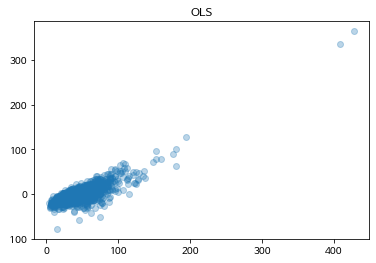

< OLS + Standard > 
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.125
Method:                 Least Squares   F-statistic:                              48.68
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                    2.91e-38
Time:                        17:33:59   Log-Likelihood:                         -7131.9
No. Observations:                1341   AIC:                                  1.427e+04
Df Residuals:                    1337   BIC:                                  1.429e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

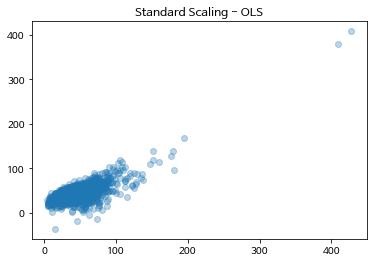

< OLS + MinMax >
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              1602.
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                        0.00
Time:                        17:34:00   Log-Likelihood:                         -6045.1
No. Observations:                1341   AIC:                                  1.210e+04
Df Residuals:                    1337   BIC:                                  1.212e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

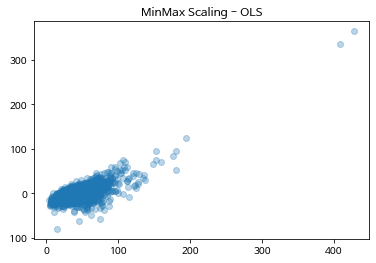

In [433]:
# OLS
model = sm.OLS(y_train, X_train)
result = model.fit()
y_pred = result.predict(X_test)

print("< OLS > ")
print(result.summary(), '\n')

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(result.rsquared_adj), '\n')
print('================================')

comp_df['OLS'] = [mse, rmse, r2, result.rsquared_adj]

plt.scatter(y_train, result.resid, alpha=0.3)
plt.title("OLS")
plt.show()


# Standard Scaling data - OLS
model_s = sm.OLS(y_train.values, X_train_s)
result_s = model_s.fit()
y_pred = result_s.predict(X_test_s)

print("< OLS + Standard > ")
print(result_s.summary(), '\n')

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(result_s.rsquared_adj), '\n')
print('================================')

comp_df['OLS_Standard'] = [mse, rmse, r2, result_s.rsquared_adj]

plt.scatter(y_train, result_s.resid, alpha=0.3)
plt.title("Standard Scaling - OLS")
plt.show()

# MinMax Scaling data - OLS
model_m = sm.OLS(y_train.values, X_train_m)
result_m = model_m.fit()
y_pred = result_m.predict(X_test_m)

print("< OLS + MinMax >")
print(result_m.summary(), '\n')

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))
print("R2: {:.3f}".format(r2))
print("Adj-R2: {:.3f}".format(result_m.rsquared_adj), '\n')
print('================================')

comp_df['OLS_MinMax'] = [mse, rmse, r2, result_m.rsquared_adj]

plt.scatter(y_train, result_m.resid, alpha=0.3)
plt.title('MinMax Scaling - OLS')
plt.show()

In [416]:
comp_df

,LR,LR_Standard,LR_MinMax,RF,RF_Standard,RF_MinMax,OLS,OLS_Standard,OLS_MinMax
MSE,250.468725,267.612073,246.945241,328.649665,627.477717,521.436738,265.494783,2438.824912,247.487365
RMSE,15.826204,16.358853,15.714491,18.128697,25.049505,22.834989,16.294011,49.384460,15.731731
R2,0.646821,0.622648,0.651790,0.536581,0.115212,0.264737,0.625634,-2.438915,0.651025
Adjusted R2,0.422407,0.422407,0.422407,0.922288,0.914728,0.927018,0.823784,0.124504,0.826883


> # **최종 모델: MinMax Scaling + RandomForest**
- Adjusted-R2 값이 가장 높은 모델을 선택함. 
- 실제값과 예측값의 분포차이 시각화

In [363]:
rf_m = RandomForestRegressor()
rf_m.fit(X_train_m, y_train)
y_pred = rf.predict(X_test_m)

> #### 빨간색 점에 모일수록 좋은 모델


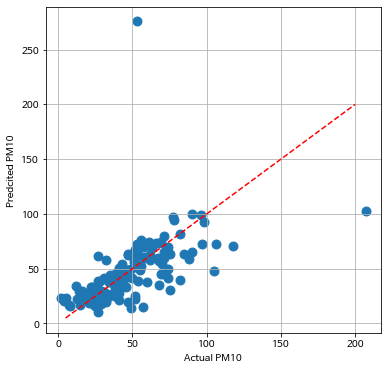

In [364]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80) 
plt.plot([5, 200], [5, 200], c='r', ls='--')
plt.xlabel("Actual PM10")
plt.ylabel("Predcited PM10")
plt.grid()
plt.show()

> #### 실제값과 예측값 시각화

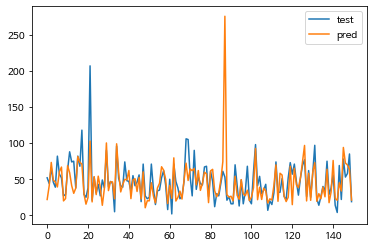

In [347]:
plt.plot(y_test.values, label='test')
plt.plot(y_pred, label='pred')

plt.legend()
plt.show()

> ### **해당 모델에서 종속변수에 가장 큰 영향을 미치는 독립변수 시각화**

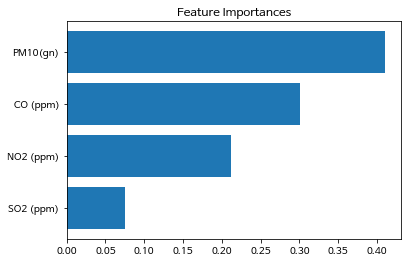

In [239]:
features=X_train.columns[[0,1,2,3]]
importances = rf_m.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

> ### *중국 지난시 미세먼지가 대전의 미세먼지 수치에 가장 큰 영향을 미치고 있다**